In [17]:
# List any trends that you are interested in finding in the below cells.
# If you open this file, please create the other diagrams missing.

In [18]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [19]:
csv_file = "merged_df.csv"
merged_df = pd.read_csv(csv_file)

CEO minimum salary: $227271
CEO maximum salary: $296247749
CEO average salary: $18268956.9877451


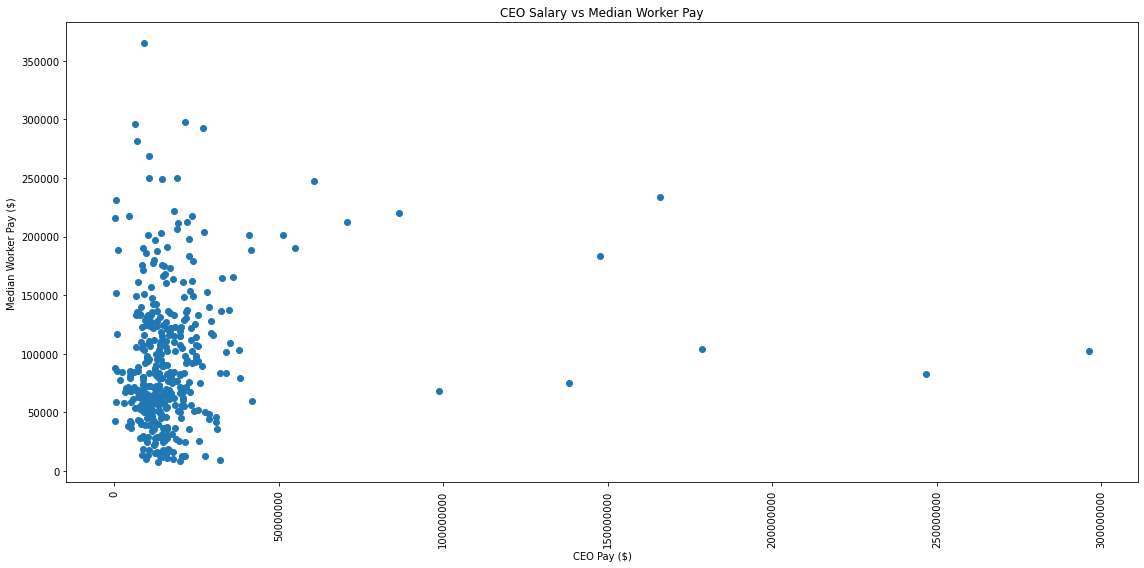

In [20]:
#Do workers at companies get paid more/less if their CEO gets paid more/less?

x_values = merged_df["CEO Salary"]
y_values = merged_df['Median Worker Pay']

plt.figure(figsize = (16,8))
plt.scatter(x_values,y_values)
plt.xlabel("CEO Pay ($)")
plt.ylabel("Median Worker Pay ($)")
plt.title("CEO Salary vs Median Worker Pay")
plt.xticks(rotation=90)
# Change x axis labels to plain numbers, other option is "scientific"
plt.ticklabel_format(axis='x',style='plain')
plt.tight_layout()
ceo_min = merged_df["CEO Salary"].min()
ceo_max = merged_df["CEO Salary"].max()
ceo_mean = merged_df["CEO Salary"].mean()

print("CEO minimum salary: $" + str(ceo_min))
print("CEO maximum salary: $" + str(ceo_max))
print("CEO average salary: $" + str(ceo_mean))

# Save the figure
plt.savefig("../Visuals/CEOvMedWorker.png")

CEO minimum salary: $227271
CEO maximum salary: $296247749
CEO average salary: $18268956.9877451


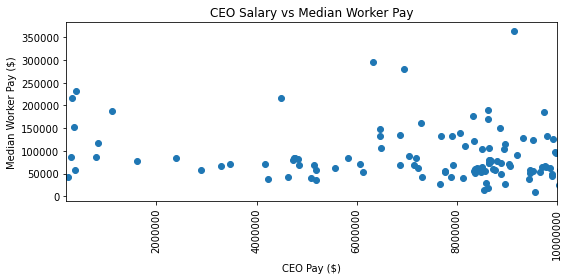

In [21]:
#Do workers at companies get paid more/less if their CEO gets paid more/less?
#Zoomed in plot

x_values = merged_df["CEO Salary"]
y_values = merged_df['Median Worker Pay']

plt.figure(figsize = (8,4))
plt.scatter(x_values,y_values)
plt.xlabel("CEO Pay ($)")
plt.ylabel("Median Worker Pay ($)")
plt.xlim([200000,10000000])
plt.title("CEO Salary vs Median Worker Pay")
plt.xticks(rotation=90)
# Change x axis labels to plain numbers, other option is "scientific"
plt.ticklabel_format(axis='x',style='plain')
plt.tight_layout()
ceo_min = merged_df["CEO Salary"].min()
ceo_max = merged_df["CEO Salary"].max()
ceo_mean = merged_df["CEO Salary"].mean()

print("CEO minimum salary: $" + str(ceo_min))
print("CEO maximum salary: $" + str(ceo_max))
print("CEO average salary: $" + str(ceo_mean))

# Save the figure
plt.savefig("../Visuals/CEOvMedWorkerZoomed.png")

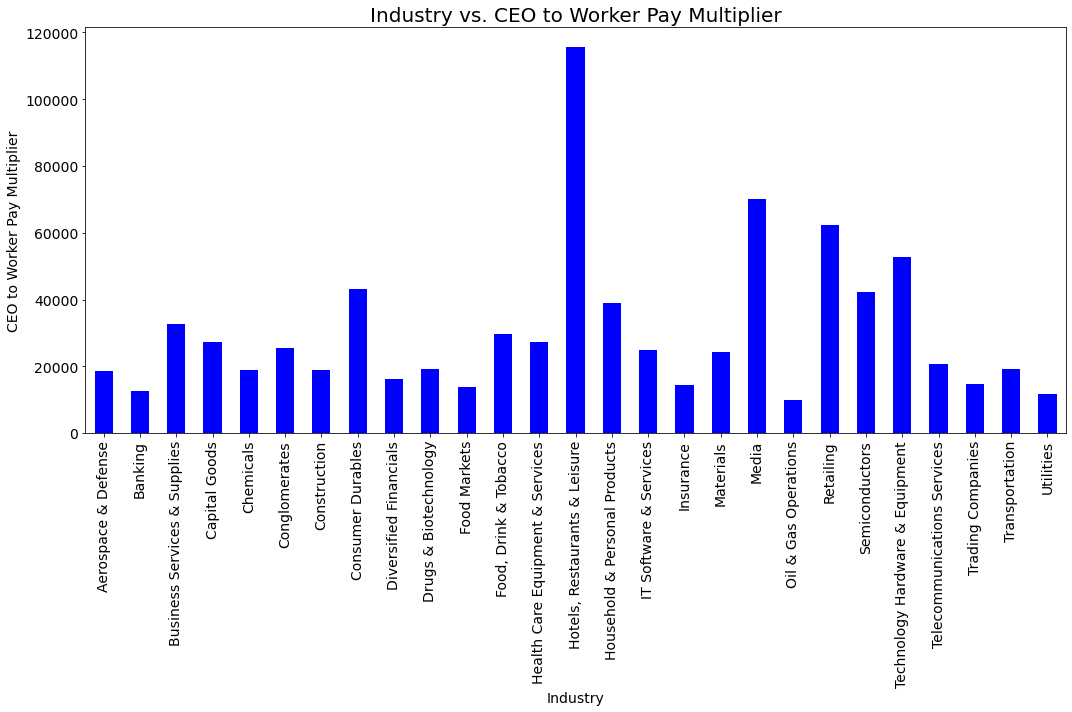

In [22]:
#Do workers at companies get paid more/less if their CEO gets paid more/less?

industry_group = merged_df.groupby(merged_df["Industry"]).mean()["CEO Salary to Worker Pay Multiplier"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("CEO to Worker Pay Multiplier",fontsize = 14)
plt.title("Industry vs. CEO to Worker Pay Multiplier",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()
# Save the figure
plt.savefig("../Visuals/CEOMult_perIndustry.png")

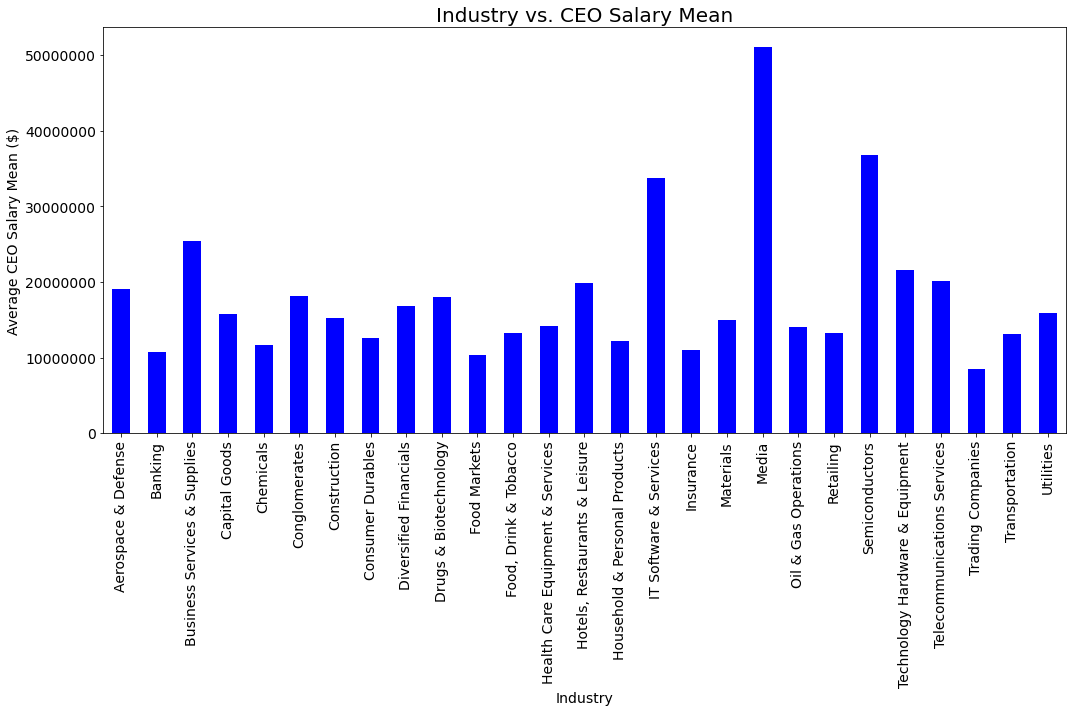

In [23]:
#Do industries that CEOs earn the most in and their workers earn the most in match?

industry_group = merged_df.groupby(merged_df["Industry"]).mean()["CEO Salary"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("Average CEO Salary Mean ($)",fontsize = 14)
plt.title("Industry vs. CEO Salary Mean",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()
# Save the figure
plt.savefig("../Visuals/AvgCEO_PerIndustry.png")

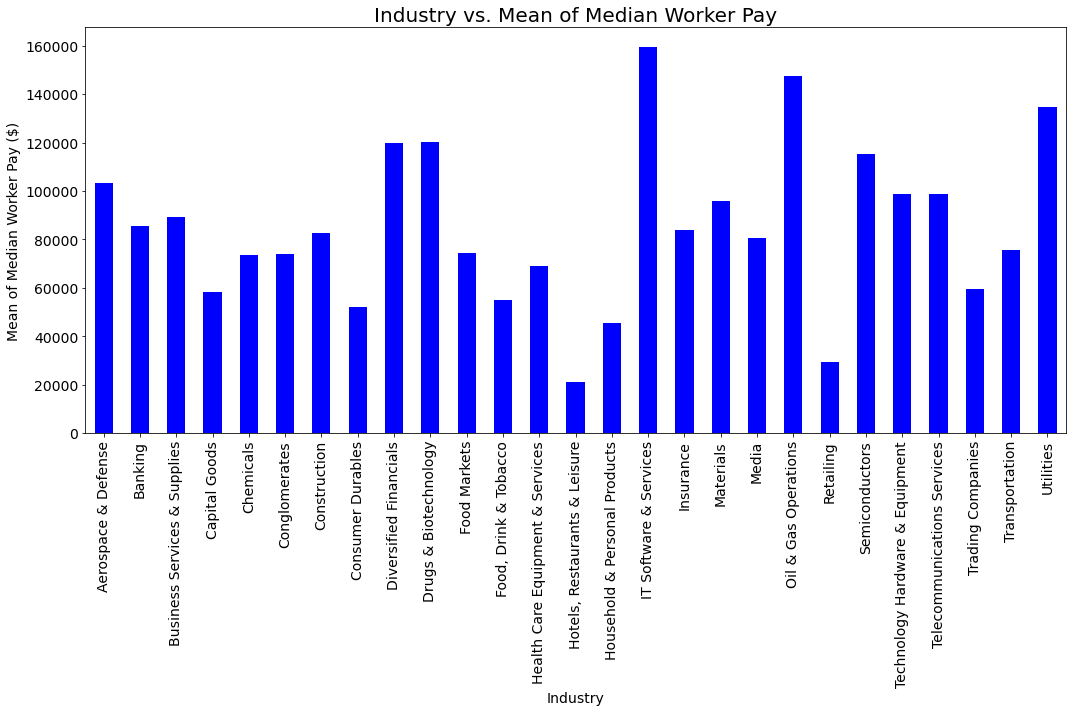

In [24]:
#Do industries that CEOs work in and their workers work in match?

industry_group = merged_df.groupby(merged_df["Industry"]).mean()["Median Worker Pay"]
industry_group
plot = industry_group.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Industry",fontsize = 14)
plt.ylabel("Mean of Median Worker Pay ($)",fontsize = 14)
plt.title("Industry vs. Mean of Median Worker Pay",fontsize = 20)
plt.ticklabel_format(axis='y',style='plain')
plt.tight_layout()
# Save the figure
plt.savefig("../Visuals/MedWorker_PerIndustry.png")

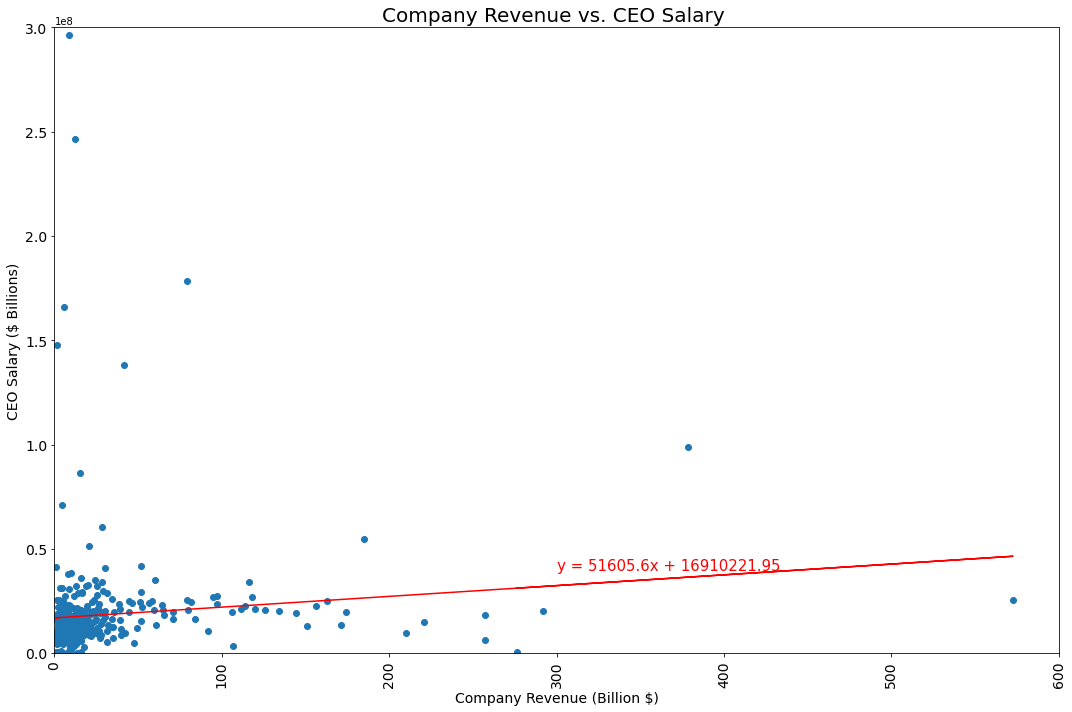

In [114]:
#Do CEOs and their workers earn more as their companies earn more?
plt.figure(figsize=(15,10))
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title,fontsize=20)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Revenue (Billion $)",fontsize = 14)
    plt.xlim([0,600])
    plt.ylim([0,300000000])
    plt.xticks(rotation=90,fontsize = 14)
    plt.yticks(fontsize=14)
    plt.ylabel(ylab,fontsize = 14)
    plt.tight_layout()
xval = merged_df["Revenue (Billions)"]
yval = merged_df["CEO Salary"]
linreg(xval,yval,"Company Revenue vs. CEO Salary ","CEO Salary ($ Billions)",(300,40000000))
# Save the figure
plt.savefig("../Visuals/RevenuevCEO.png")

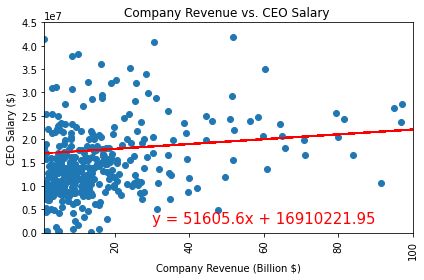

In [103]:
#Do CEOs and their workers earn more as their companies earn more?
#Zoomed in plot
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Revenue (Billion $)")
    plt.xlim([1,100])
    plt.ylim([0,45000000])
    plt.xticks(rotation=90)
    plt.ylabel(ylab)
    plt.tight_layout()  
xval = merged_df["Revenue (Billions)"]
yval = merged_df["CEO Salary"]
linreg(xval,yval,"Company Revenue vs. CEO Salary ","CEO Salary ($)",(30,2000000))
# Save the figure
plt.savefig("../Visuals/RevenuevCEOZoomed.png")

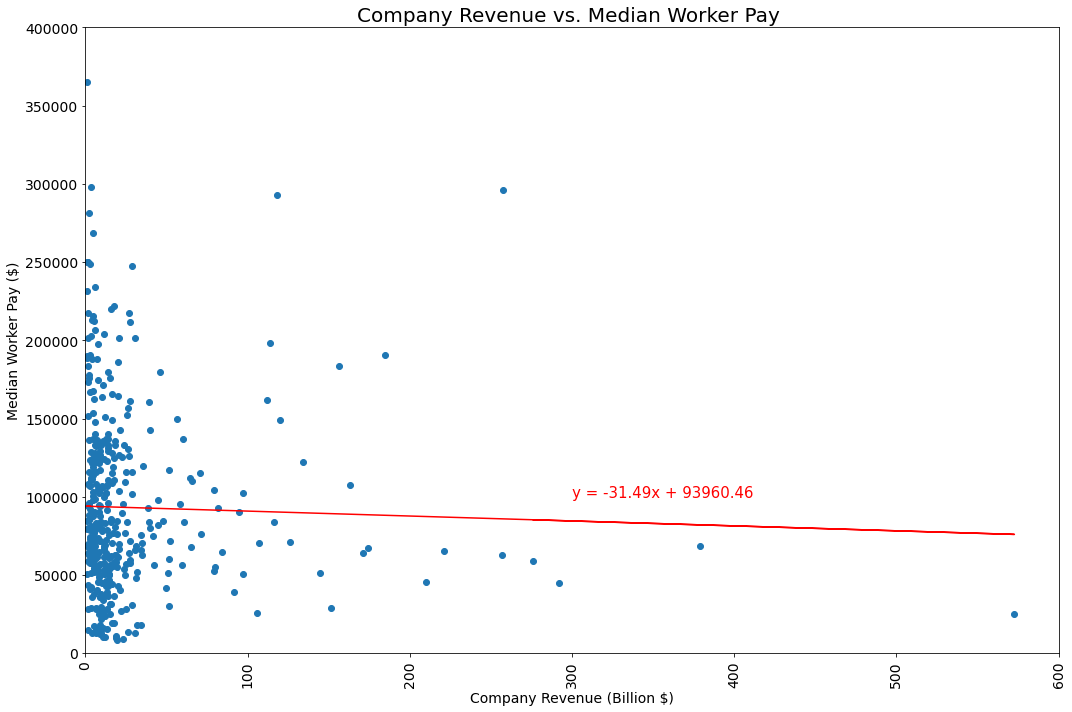

In [75]:
#Do CEOs and their workers earn more as their companies earn more?
plt.figure(figsize=(15,10))
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title, fontsize = 20)
    plt.xlim([0,600])
    plt.ylim([0,400000])
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Revenue (Billion $)", fontsize = 14)
    plt.xticks(rotation=90, fontsize = 14)
    plt.ylabel(ylab, fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.tight_layout()  
xval = merged_df["Revenue (Billions)"]
yval = merged_df["Median Worker Pay"]
linreg(xval,yval,"Company Revenue vs. Median Worker Pay ","Median Worker Pay ($)",(300,100000))
# Save the figure
plt.savefig("../Visuals/RevenuevWorker.png")

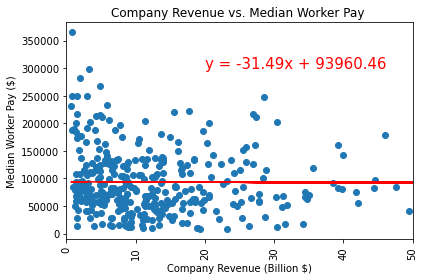

In [111]:
#Do CEOs and their workers earn more as their companies earn more?
#Zoomed in plot

def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Revenue (Billion $)")
    plt.xticks(rotation=90)
    plt.ylabel(ylab)
    plt.xlim([0,50])
    plt.tight_layout()  
xval = merged_df["Revenue (Billions)"]
yval = merged_df["Median Worker Pay"]
linreg(xval,yval,"Company Revenue vs. Median Worker Pay ","Median Worker Pay ($)",(20,300000))
# Save the figure
plt.savefig("../Visuals/RevenuevWorkerZoomed.png")

0.15382623191804226


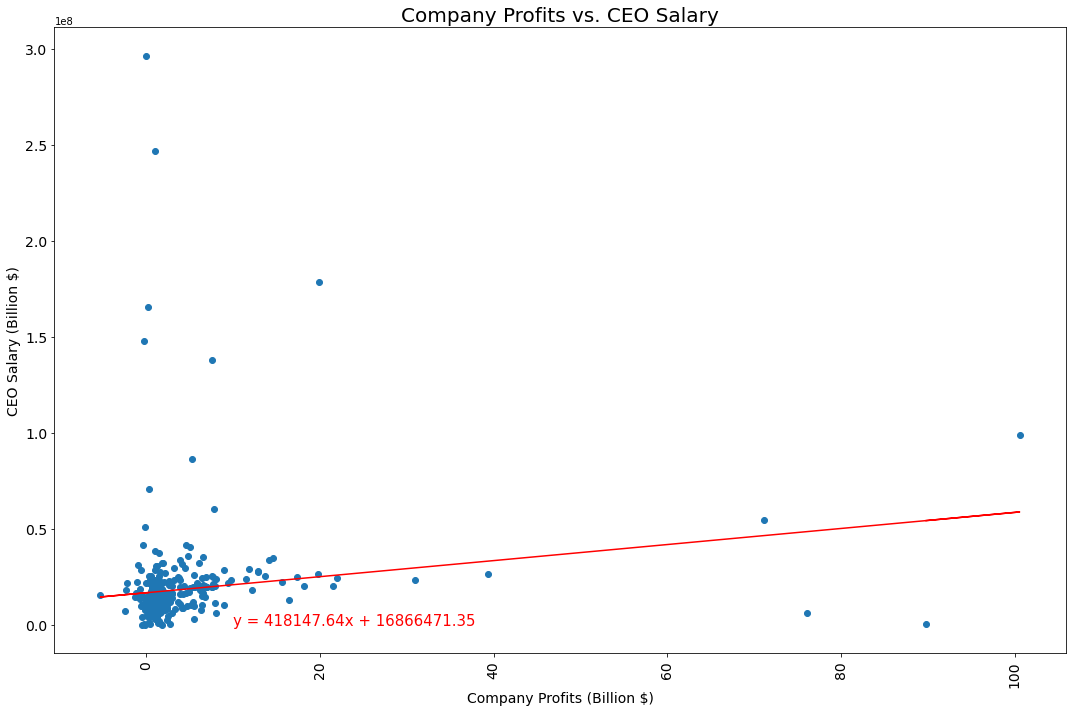

In [122]:
#Do CEOs and their workers earn more as their companies profit?
plt.figure(figsize=(15,10))
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title,fontsize=20)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Profits (Billion $)",fontsize = 14)
    plt.xticks(rotation=90,fontsize = 14)
    plt.yticks(fontsize=14)
    plt.ylabel(ylab,fontsize = 14)
    plt.tight_layout()
    return r_value
xval = merged_df["Profits (Billions)"]
yval = merged_df["CEO Salary"]
r_value = linreg(xval,yval,"Company Profits vs. CEO Salary","CEO Salary (Billion $)",(10,200))
print(r_value)
# Save the figure
plt.savefig("../Visuals/ProfitvCEO.png")

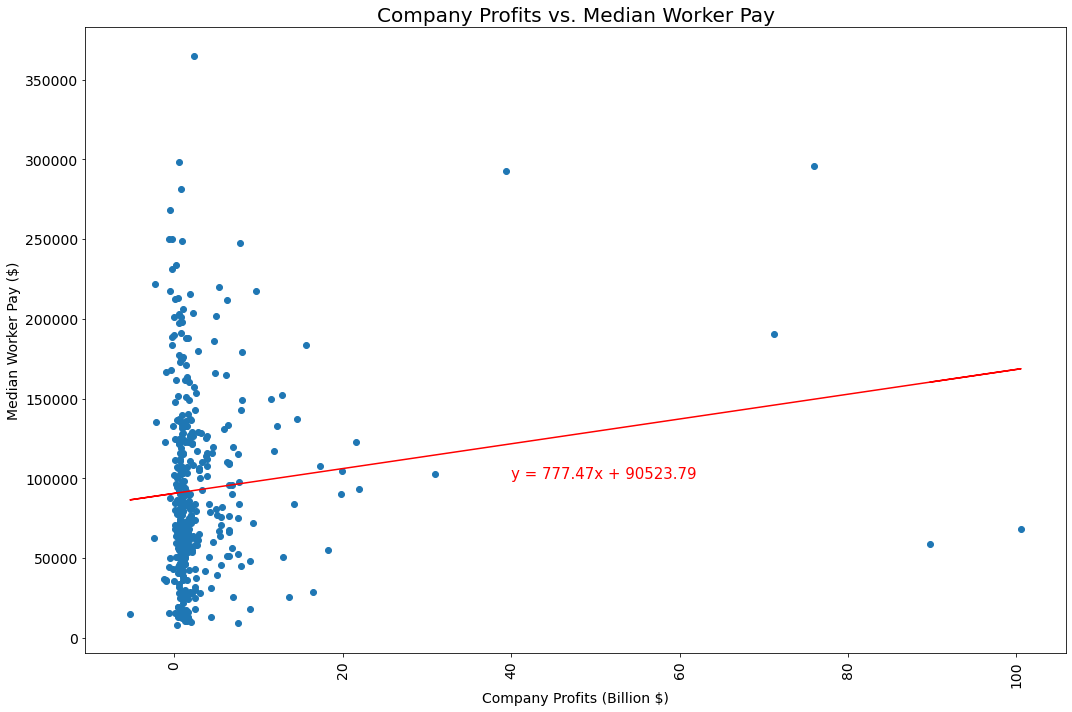

In [88]:
#Do CEOs and their workers earn more as their companies profit?
plt.figure(figsize=(15,10))
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title,fontsize=20)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Profits (Billion $)",fontsize = 14)
    plt.xticks(rotation=90,fontsize = 14)
    plt.yticks(fontsize=14)
    plt.ylabel(ylab,fontsize = 14)
    plt.tight_layout()
xval = merged_df["Profits (Billions)"]
yval = merged_df["Median Worker Pay"]
linreg(xval,yval,"Company Profits vs. Median Worker Pay","Median Worker Pay ($)",(40,100000))
# Save the figure
plt.savefig("../Visuals/ProfitvWorker.png")

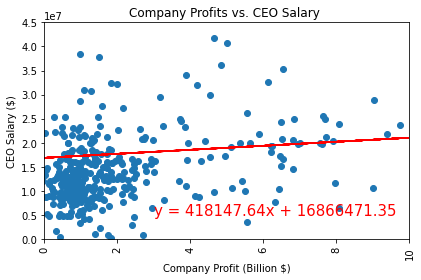

In [113]:
#Do CEOs and their workers earn more as their companies earn more?
#Zoomed in plot
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Profit (Billion $)")
    plt.xlim([0,10])
    plt.ylim([0,45000000])
    plt.xticks(rotation=90)
    plt.ylabel(ylab)
    plt.tight_layout()  
xval = merged_df["Profits (Billions)"]
yval = merged_df["CEO Salary"]
linreg(xval,yval,"Company Profits vs. CEO Salary ","CEO Salary ($)",(3,5000000))
# Save the figure
plt.savefig("../Visuals/ProfitsvCEOZoomed.png")

0.12314769809693897


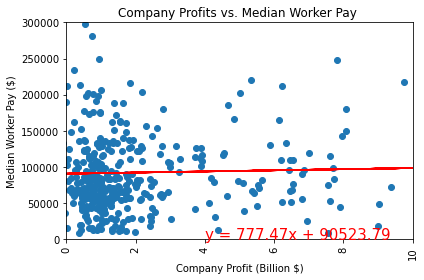

In [118]:

#Do CEOs and their workers earn more as their companies earn more?
#Zoomed in plot
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Profit (Billion $)")
    plt.xlim([0,10])
    plt.ylim([0,300000])
    plt.xticks(rotation=90)
    plt.ylabel(ylab)
    plt.tight_layout()
    return r_value 
xval = merged_df["Profits (Billions)"]
yval = merged_df["Median Worker Pay"]
r_value = linreg(xval,yval,"Company Profits vs. Median Worker Pay ","Median Worker Pay ($)",(4,50))
print(r_value)
# Save the figure
plt.savefig("../Visuals/ProfitsvWorkersZoomed.png")

In [115]:
#Add to presentation to show correlation between 
merged_df.corr()

,Unnamed: 0,2022 Ranking,CEO Salary,Median Worker Pay,Year Founded,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),CEO Salary to Worker Pay Multiplier
Unnamed: 0,1.000000,0.998780,-0.154797,-0.044591,-0.039288,-0.489795,-0.426725,-0.332665,-0.353205,-0.082082
2022 Ranking,0.998780,1.000000,-0.152515,-0.041855,-0.040263,-0.475661,-0.411551,-0.320855,-0.340199,-0.082936
CEO Salary,-0.154797,-0.152515,1.000000,0.129517,0.064734,0.107613,0.153826,0.047678,0.197893,0.585990
Median Worker Pay,-0.044591,-0.041855,0.129517,1.000000,0.083723,-0.028270,0.123148,0.031661,0.147513,-0.384996
Year Founded,-0.039288,-0.040263,0.064734,0.083723,1.000000,0.008733,0.016896,0.016079,0.036930,0.058470
Revenue (Billions),-0.489795,-0.475661,0.107613,-0.028270,0.008733,1.000000,0.629248,0.294630,0.587355,0.111882
Profits (Billions),-0.426725,-0.411551,0.153826,0.123148,0.016896,0.629248,1.000000,0.410596,0.898763,0.073834
Assets (Billions),-0.332665,-0.320855,0.047678,0.031661,0.016079,0.294630,0.410596,1.000000,0.228248,-0.013223
Market Value (Billions),-0.353205,-0.340199,0.197893,0.147513,0.036930,0.587355,0.898763,0.228248,1.000000,0.110008
CEO Salary to Worker Pay Multiplier,-0.082082,-0.082936,0.585990,-0.384996,0.058470,0.111882,0.073834,-0.013223,0.110008,1.000000


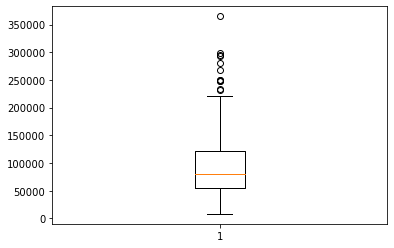

In [156]:
x = merged_df["Median Worker Pay"]
plt.boxplot(x,sym='o')
plt.savefig("../Visuals/MedWorkerBox.png")

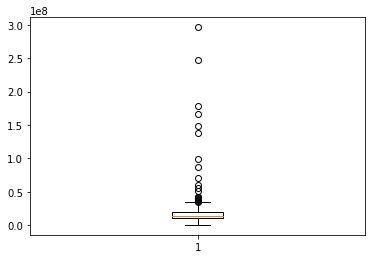

In [157]:
x = merged_df["CEO Salary"]
plt.boxplot(x,sym='o')
plt.savefig("../Visuals/CEOBox.png")

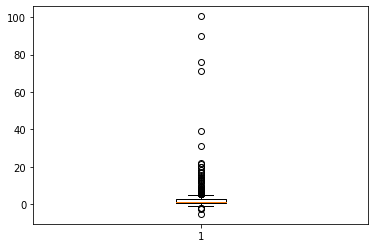

In [158]:
x = merged_df["Profits (Billions)"]
plt.boxplot(x,sym='o')
plt.savefig("../Visuals/ProfitsBox.png")

In [150]:
no_outliers_workers = merged_df.loc[merged_df["Median Worker Pay"] < 200000,:]
no_outliers_ceos = merged_df.loc[merged_df["CEO Salary"] < 50000000,:]
no_outliers_profit = no_outliers_ceos.loc[no_outliers_ceos["Profits (Billions)"] < 5,:]

0.20939453658593346


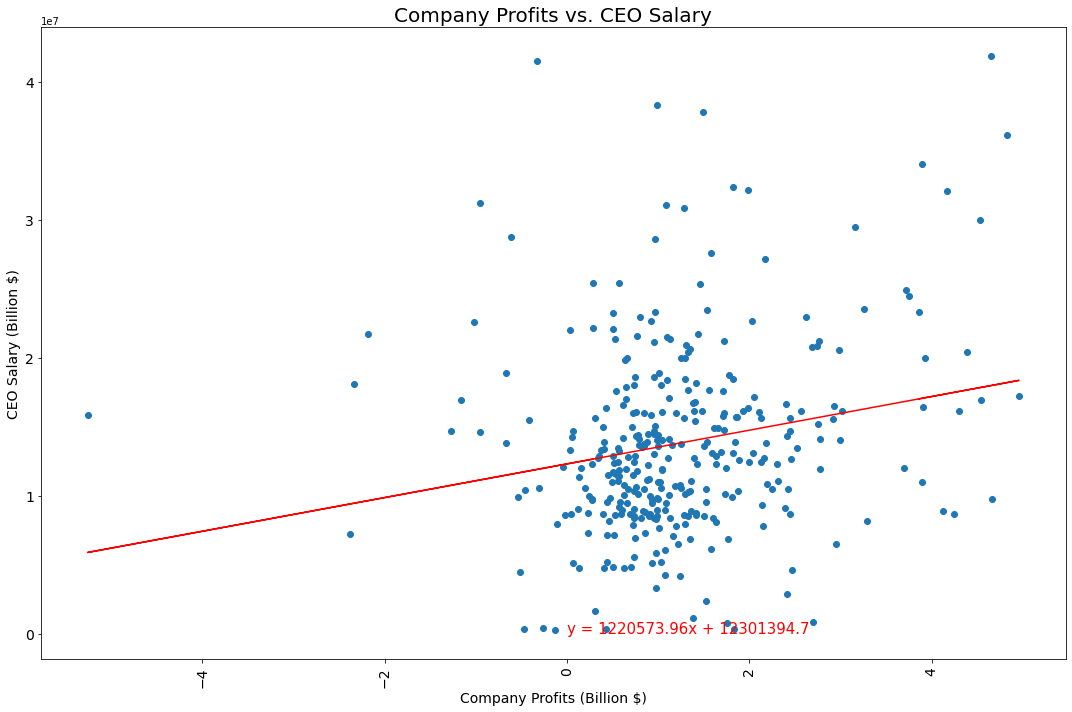

In [152]:
#Profits vs CEO without outliers
plt.figure(figsize=(15,10))
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title,fontsize=20)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Profits (Billion $)",fontsize = 14)
    plt.xticks(rotation=90,fontsize = 14)
    plt.yticks(fontsize=14)
    plt.ylabel(ylab,fontsize = 14)
    plt.tight_layout()
    return r_value
xval = no_outliers_profit["Profits (Billions)"]
yval = no_outliers_profit["CEO Salary"]
r_value = linreg(xval,yval,"Company Profits vs. CEO Salary","CEO Salary (Billion $)",(0,0))
print(r_value)
# Save the figure
plt.savefig("../Visuals/ProfitvCEO_outliers.png")

-0.022449172486062725


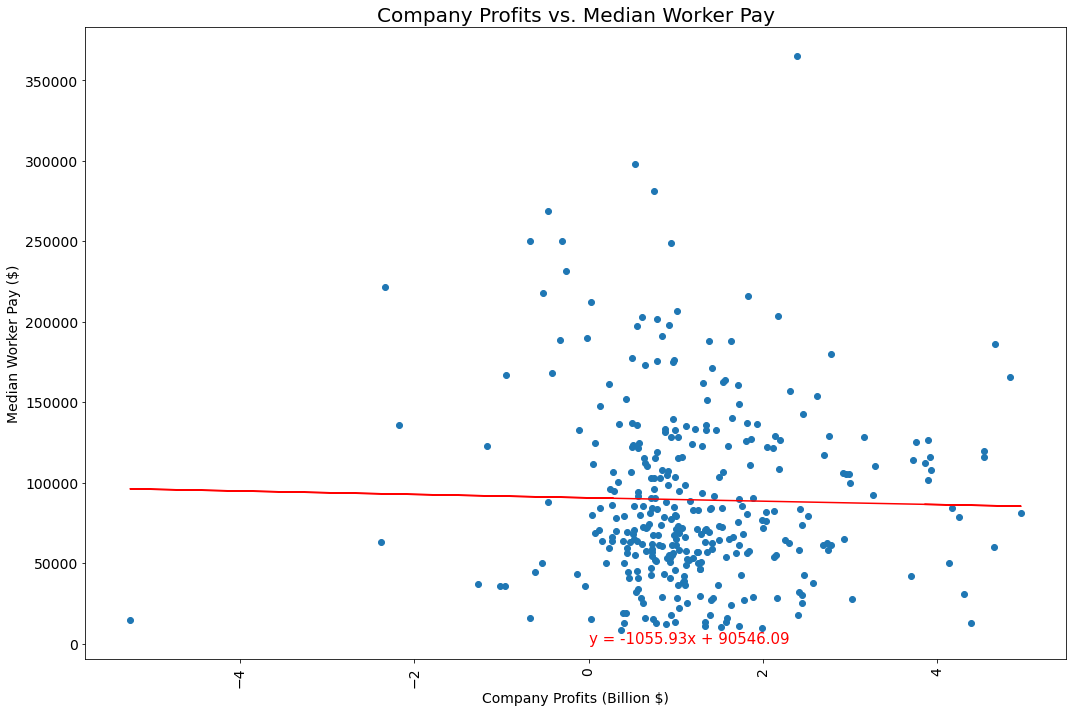

In [154]:
#Profits vs Median Worker without outliers
plt.figure(figsize=(15,10))
def linreg(xval, yval, title, ylab, textcoord):
    (slope, intercept, r_value, p_value, std_err) = linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xval,yval)
    plt.plot(xval,regress_values,"r")
    plt.annotate(line_eq, textcoord, fontsize=15, color="red")
    plt.title(title,fontsize=20)
    plt.ticklabel_format(axis='x',style='plain')
    plt.xlabel("Company Profits (Billion $)",fontsize = 14)
    plt.xticks(rotation=90,fontsize = 14)
    plt.yticks(fontsize=14)
    plt.ylabel(ylab,fontsize = 14)
    plt.tight_layout()
    return r_value
xval = no_outliers_profit["Profits (Billions)"]
yval = no_outliers_profit["Median Worker Pay"]
r_value = linreg(xval,yval,"Company Profits vs. Median Worker Pay","Median Worker Pay ($)",(0,0))
print(r_value)
# Save the figure
plt.savefig("../Visuals/ProfitvWorker_outliers.png")